In [1]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
demo = pd.read_csv('D:/Papers/paper_code/new/Data/Raw/Solar_Power_Generation.csv')
demo['DATE_TIME']= pd.to_datetime(demo['DATE_TIME'],format='%d-%m-%Y %H:%M')
data = demo[demo['SOURCE_KEY'] == '3PZuoBAID5Wc2HD']
data.drop(columns = {'PLANT_ID', 'SOURCE_KEY'}, inplace = True)
data.reset_index(drop = True, inplace = True)

In [3]:
data.head()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,0.0,0.0,0.0,6987759.0
1,2020-05-15 00:15:00,0.0,0.0,0.0,6987759.0
2,2020-05-15 00:30:00,0.0,0.0,0.0,6987759.0
3,2020-05-15 00:45:00,0.0,0.0,0.0,6987759.0
4,2020-05-15 01:00:00,0.0,0.0,0.0,6987759.0


In [4]:
data.shape

(3118, 5)

In [5]:
data['lag_1'] = data[data.columns[1]].shift(192)
data['lag_2'] = data[data.columns[2]].shift(192)
data['lag_DY'] = data[data.columns[3]].shift(192)
data = data.dropna(axis = 0, how = 'any')
data.reset_index(drop = True, inplace = True)
data.head()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,lag_1,lag_2,lag_DY
0,2020-05-17 05:00:00,0.0,0.0,0.0,7000689.0,0.0,0.0,0.0
1,2020-05-17 05:15:00,0.0,0.0,0.0,7000689.0,0.0,0.0,0.0
2,2020-05-17 05:30:00,0.0,0.0,0.0,7000689.0,0.0,0.0,0.0
3,2020-05-17 05:45:00,0.0,0.0,0.0,7000689.0,0.0,0.0,0.0
4,2020-05-17 06:00:00,0.0,0.0,0.0,7000689.0,0.0,0.0,0.0


In [6]:
def time_features(df, date_columns):
    
    df['Month'] = pd.to_datetime(df[date_columns]).dt.month
    df['Day'] = pd.to_datetime(df[date_columns]).dt.day
    df['Hour'] = pd.to_datetime(df[date_columns]).dt.hour
    df['Minute'] = pd.to_datetime(df[date_columns]).dt.minute
    df['Weekday'] = pd.to_datetime(df[date_columns]).dt.weekday
    
    return df

In [7]:
Solar_data = time_features(data, 'DATE_TIME')

In [8]:
Solar_data.drop(columns = {'DC_POWER', 'AC_POWER', 'TOTAL_YIELD'}, inplace = True)

In [9]:
Solar_data.head(3)

,DATE_TIME,DAILY_YIELD,lag_1,lag_2,lag_DY,Month,Day,Hour,Minute,Weekday
0,2020-05-17 05:00:00,0.0,0.0,0.0,0.0,5,17,5,0,6
1,2020-05-17 05:15:00,0.0,0.0,0.0,0.0,5,17,5,15,6
2,2020-05-17 05:30:00,0.0,0.0,0.0,0.0,5,17,5,30,6


In [10]:
Solar_data.columns

Index(['DATE_TIME', 'DAILY_YIELD', 'lag_1', 'lag_2', 'lag_DY', 'Month', 'Day',
       'Hour', 'Minute', 'Weekday'],
      dtype='object')

In [11]:
#data normalization
columns = {'DAILY_YIELD', 'lag_1', 'lag_2', 'lag_DY', 'Month', 'Day',
       'Hour', 'Minute', 'Weekday'}

for col in columns:
    scaler = MinMaxScaler()
    Solar_data[col] = scaler.fit_transform(Solar_data[col].values.reshape(-1,1))

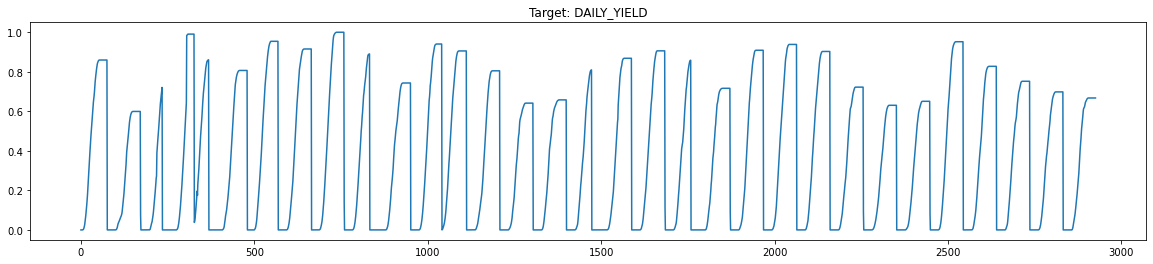

In [12]:
sns.reset_orig()
plt.figure(figsize = (20,4))
plt.title('Target: DAILY_YIELD')
plt.plot(data['DAILY_YIELD'])
plt.show()

In [14]:
#Solar_data.to_csv('../Data/Processed/Solar_data.csv', index = False)